In [57]:
import requests
import pandas as pd

# Remove the limit to display the number of cols
pd.options.display.max_columns = None

# Only show 5 numbers after the decimal & gets rid of scientific notation
pd.options.display.precision = 5

In [6]:
API_KEY = "zWAtdFQxeCdADBYwbIvHiVRrUwo8rOTOc4PBzJzF"

In [12]:
# categories IDs
categories_url = f"https://api.eia.gov/category/?api_key={API_KEY}&category_id=3390101"
child_categories = requests.get(url=categories_url).json()["category"]["childcategories"]

In [16]:
# sectors - states
sectors_categories_df = pd.DataFrame.from_dict(child_categories)
sectors_categories_df.head()

,category_id,name
0,3390105,United States Lower 48 (US48)
1,3390106,California (CAL)
2,3390107,Carolinas (CAR)
3,3390108,Central (CENT)
4,3390109,Florida (FLA)


In [72]:
# Florida sector
id_florida = sectors_categories_df.loc[sectors_categories_df.name=="Florida (FLA)", "category_id"].item()
url_florida = f"https://api.eia.gov/category/?api_key={API_KEY}&category_id={id_florida}"

In [73]:
# data series for Florida
florida_series_df = pd.DataFrame.from_dict(requests.get(url_florida).json()["category"]["childseries"])
florida_series_df

,series_id,name,f,units,updated
0,EBA.FLA-ALL.NG.COL.H,"Net generation from coal for Florida (region),...",H,megawatthours,09-MAY-22 09.35.01 AM
1,EBA.FLA-ALL.NG.COL.HL,"Net generation from coal for Florida (region),...",HL,megawatthours,09-MAY-22 09.35.01 AM
2,EBA.FLA-ALL.NG.NG.H,Net generation from natural gas for Florida (r...,H,megawatthours,09-MAY-22 09.35.02 AM
3,EBA.FLA-ALL.NG.NG.HL,Net generation from natural gas for Florida (r...,HL,megawatthours,09-MAY-22 09.35.02 AM
4,EBA.FLA-ALL.NG.NUC.H,Net generation from nuclear for Florida (regio...,H,megawatthours,09-MAY-22 09.35.01 AM
5,EBA.FLA-ALL.NG.NUC.HL,Net generation from nuclear for Florida (regio...,HL,megawatthours,09-MAY-22 09.35.01 AM
6,EBA.FLA-ALL.NG.OIL.H,Net generation from petroleum for Florida (reg...,H,megawatthours,09-MAY-22 09.35.01 AM
7,EBA.FLA-ALL.NG.OIL.HL,Net generation from petroleum for Florida (reg...,HL,megawatthours,09-MAY-22 09.35.01 AM
8,EBA.FLA-ALL.NG.OTH.H,Net generation from other for Florida (region)...,H,megawatthours,09-MAY-22 09.35.01 AM
9,EBA.FLA-ALL.NG.OTH.HL,Net generation from other for Florida (region)...,HL,megawatthours,09-MAY-22 09.35.01 AM


In [84]:
# Net generation from coal for Florida (region), hourly - UTC time
# series ID: EBA.FLA-ALL.NG.COL.H
id_coal_florida = "EBA.FLA-ALL.NG.COL.H"
url_coal_florida = f"https://api.eia.gov/series/?api_key={API_KEY}&series_id={id_coal_florida}"

In [89]:
response = requests.get(url_coal_florida).json()
response["request"]

{'command': 'series', 'series_id': 'EBA.FLA-ALL.NG.COL.H'}

In [90]:
to_show = response["series"][0].copy()
to_show["data"] = []
to_show

{'series_id': 'EBA.FLA-ALL.NG.COL.H',
 'name': 'Net generation from coal for Florida (region), hourly - UTC time',
 'units': 'megawatthours',
 'f': 'H',
 'description': 'Timestamps follow the ISO8601 standard (https://en.wikipedia.org/wiki/ISO_8601). Hourly representations are provided in Universal Time.',
 'start': '20180701T05Z',
 'end': '20220509T04Z',
 'updated': '2022-05-09T09:35:01-0400',
 'data': []}

In [91]:
# dataframe
data_coal = pd.DataFrame.from_records(response["series"][0]["data"], columns=["date", "value"])
data_coal.date = pd.to_datetime(data_coal.date)
data_coal

,date,value
0,2022-05-09 04:00:00+00:00,2519
1,2022-05-09 03:00:00+00:00,2981
2,2022-05-09 02:00:00+00:00,3384
3,2022-05-09 01:00:00+00:00,3441
4,2022-05-09 00:00:00+00:00,3630
...,...,...
33787,2018-07-01 09:00:00+00:00,1994
33788,2018-07-01 08:00:00+00:00,1867
33789,2018-07-01 07:00:00+00:00,1960
33790,2018-07-01 06:00:00+00:00,2105


<AxesSubplot:xlabel='date'>

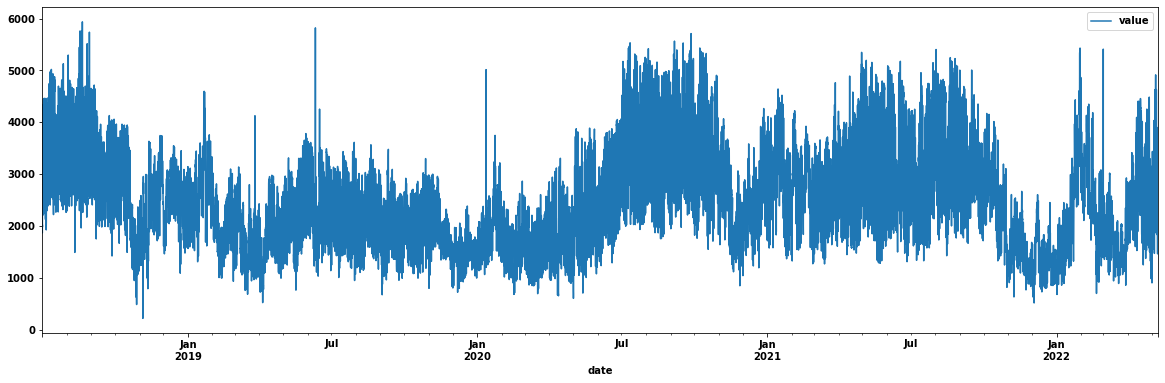

In [92]:
# plots

to_plot = data_coal.copy()
to_plot.set_index("date", drop=True, inplace=True)

to_plot.plot(figsize=(20,6))

In [93]:
# one dataframe for all data sources for Florida
sources_florida_utc = florida_series_df.loc[florida_series_df.f=="H"]
sources_florida_utc

,series_id,name,f,units,updated
0,EBA.FLA-ALL.NG.COL.H,"Net generation from coal for Florida (region),...",H,megawatthours,09-MAY-22 09.35.01 AM
2,EBA.FLA-ALL.NG.NG.H,Net generation from natural gas for Florida (r...,H,megawatthours,09-MAY-22 09.35.02 AM
4,EBA.FLA-ALL.NG.NUC.H,Net generation from nuclear for Florida (regio...,H,megawatthours,09-MAY-22 09.35.01 AM
6,EBA.FLA-ALL.NG.OIL.H,Net generation from petroleum for Florida (reg...,H,megawatthours,09-MAY-22 09.35.01 AM
8,EBA.FLA-ALL.NG.OTH.H,Net generation from other for Florida (region)...,H,megawatthours,09-MAY-22 09.35.01 AM
10,EBA.FLA-ALL.NG.SUN.H,Net generation from solar for Florida (region)...,H,megawatthours,09-MAY-22 09.35.01 AM
12,EBA.FLA-ALL.NG.WAT.H,Net generation from hydro for Florida (region)...,H,megawatthours,09-MAY-22 09.35.01 AM


In [112]:
dfs = []

for i, row in sources_florida_utc.iterrows():
    series_id = row.series_id
    col_name = series_id.split(".")[3]
    url = f"https://api.eia.gov/series/?api_key={API_KEY}&series_id={series_id}"
    response = requests.get(url).json()
    data = pd.DataFrame.from_records(response["series"][0]["data"], columns=["date", col_name])
    data.date = pd.to_datetime(data.date)
    dfs.append(data)

In [113]:
df = pd.concat(dfs, axis=1, join='inner')

In [114]:
df.index = df.pop("date").iloc[:,0]

In [118]:
df.sort_index(inplace=True)

In [120]:
df.head()

,COL,NG,NUC,OIL,OTH,SUN,WAT
date,,,,,,,
2018-07-02 05:00:00+00:00,2749,18166,3778,0,1017,0,32
2018-07-02 06:00:00+00:00,2427,16553,3785,0,983,0,31
2018-07-02 07:00:00+00:00,2264,15327,3778,0,966,0,32
2018-07-02 08:00:00+00:00,2216,14561,3784,0,964,0,31
2018-07-02 09:00:00+00:00,2213,14400,3782,0,981,0,32


<AxesSubplot:xlabel='date'>

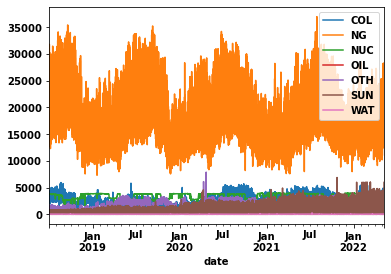

In [119]:
df.plot()